#### CSC 592 Introduction to Data Science Excercise - Assignment 3
##### Submitted by:
##### Name: Md Kausar Hamid Miji
##### Student ID: 101114993 and
##### Graduate Student: Computer Science and Engineering
##### and
##### Name: Md Niamul Quader
##### Student ID: 101098310
##### Graduate Student: Mechanical Engineering

**-------------------------------------------------------**

**Classifying movie reviews: A binary classification example**

#### Loading different Libraries:

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

2022-10-30 01:45:08.784766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 01:45:09.026417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-30 01:45:09.026435: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-30 01:45:09.060514: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-30 01:45:09.650646: W tensorflow/stream_executor/platform/de

**Loading the IMDB dataset**

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
# For Training Data:

# Data class is numpy.ndarray
print(type(train_data))

# There are 25000 sample data
print(train_data.shape)

# each sample data has different numbers of words.
print(len(train_data[0]))

# Each samples are labeled. 
print('Total number of words in train_data[0] is: ', len(train_data[0]), 'and it is labeled as: ', train_labels[0])

print(train_data[0])

<class 'numpy.ndarray'>
(25000,)
218
Total number of words in train_data[0] is:  218 and it is labeled as:  1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 1

In [4]:
# Maximum number of words in a train_data sample is 9999 as we have loaded imdb.load_data with num_word = 10000.

max([max(sample) for sample in train_data])

9999

**Decoding reviews back to text**

In [5]:
# To decode the reviews, we need to Load the dictionary mappings from word to integer index first. After that, we will swap the places of Key and Value in the dictionary using a for loop. 
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# As sequence number 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown", therefore, to decode the review, mapping integer indices to words indices are off by 3.

decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[50]])

In [6]:
print(train_labels[50])

0


In [7]:
print(decoded_review)

? i actually saw this movie at a theater as soon as i handed the ? my money she said two words i had never heard at a theater before or since no ? as soon as i heard those words i should have just ? bye bye to my cash and gone home but no ? i went in and watched the movie this movie didn't make anyone in the theater laugh not even once not even ? mostly we sat there in stunned silence every ten minutes or so someone would yell this movie sucks the audience would applaud ? then sit there in stunned bored silence for another ten minutes


In [8]:
#Preparing the data
#Encoding the integer sequences via multi-hot encoding

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all zero matrix of shape (len(sequences),10K)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Ve ctorizing Training and Test Data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[10]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
#Preprossessing Data
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
print(len(train_data[1]))
print(len(train_data[2]))
print(len(train_data[3]))
print(len(train_data[4]))

189
141
550
147


#### Building your model

### Model definition (For All question)

In [13]:
# Model for One (01) layer with 16 Nodes.

model_L01 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Model for Two (02) layer with 16 nodes on each layer.

model_L02 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Model for Three (03) layer with 16 Nodes.

model_L03 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Model for One (01) layer with 100 Nodes.

model_L01_N100 = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Model for Two (02) layer with 100 nodes on each layer.

model_L02_N100 = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Model for Three (03) layer with 100 Nodes.

model_L03_N100 = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2022-10-30 01:45:27.425884: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-30 01:45:27.425938: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-30 01:45:27.425973: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Dreamer): /proc/driver/nvidia/version does not exist
2022-10-30 01:45:27.427590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Question 01) Change the model to use one hidden (aka "representation") layer, and see how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book).  Repeat this for three hidden layers.  Comment on any differences you find, as well as what you'd expect.

###### Validating our approach

In [14]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

###### Compiling data and Training the model with 01 layers.

In [15]:
#Cloning model_L01

model_01 = clone_model(model_L01)

# Compiling with 01 layer model 
model_01.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_model_01 = model_01.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=500,
                    validation_data=(x_val, y_val))

2022-10-30 01:45:32.868027: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 0.5002 - accuracy: 0.8093

2022-10-30 01:45:34.442469: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 2s 40ms/step - loss: 0.5002 - accuracy: 0.8093 - val_loss: 0.3986 - val_accuracy: 0.8654
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3289 - accuracy: 0.8999 - val_loss: 0.3416 - val_accuracy: 0.8743
Epoch 3/20
30/30 [==============================] - 3s 102ms/step - loss: 0.2546 - accuracy: 0.9202 - val_loss: 0.2935 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2092 - accuracy: 0.9350 - val_loss: 0.2801 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1767 - accuracy: 0.9475 - val_loss: 0.2738 - val_accuracy: 0.8912
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1533 - accuracy: 0.9541 - val_loss: 0.2785 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1335 - accuracy: 0.9613 - val_loss: 0.2807 - val_accuracy: 0.8858
Epoch 8/20
30/30 [=====

###### Compiling data and Training the model with 02 layers.

In [16]:
model_02 = clone_model(model_L02)

# Compiling with 02 layer model 
model_02.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_model_02 = model_02.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=500,
                    validation_data=(x_val, y_val))

2022-10-30 01:46:15.075536: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
29/30 [============================>.] - ETA: 0s - loss: 0.5665 - accuracy: 0.7688

2022-10-30 01:46:18.602502: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 400000000 exceeds 10% of free system memory.


30/30 [==============================] - 3s 91ms/step - loss: 0.5625 - accuracy: 0.7713 - val_loss: 0.4443 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3575 - accuracy: 0.8936 - val_loss: 0.3472 - val_accuracy: 0.8662
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2541 - accuracy: 0.9210 - val_loss: 0.2887 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1947 - accuracy: 0.9394 - val_loss: 0.2749 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1543 - accuracy: 0.9534 - val_loss: 0.2753 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1275 - accuracy: 0.9605 - val_loss: 0.2835 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1043 - accuracy: 0.9705 - val_loss: 0.2993 - val_accuracy: 0.8864
Epoch 8/20
30/30 [======

###### Compiling data and Training the model with 03 layers.

In [17]:
# Cloning model
model_03 = clone_model(model_L03)

# Compiling with 03 layer model 
model_03.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_model_03 = model_03.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=500,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-10-30 01:46:40.371271: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 600000000 exceeds 10% of free system memory.


30/30 [==============================] - 1s 29ms/step - loss: 0.5450 - accuracy: 0.7916 - val_loss: 0.4263 - val_accuracy: 0.8301
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3225 - accuracy: 0.8953 - val_loss: 0.3182 - val_accuracy: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2318 - accuracy: 0.9261 - val_loss: 0.2794 - val_accuracy: 0.8921
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1816 - accuracy: 0.9403 - val_loss: 0.2907 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1468 - accuracy: 0.9519 - val_loss: 0.2807 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1196 - accuracy: 0.9621 - val_loss: 0.3206 - val_accuracy: 0.8772
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0989 - accuracy: 0.9705 - val_loss: 0.3154 - val_accuracy: 0.8838
Epoch 8/20
30/30 [======

In [18]:
# History Dictionary for 02 layer models

history_dict_model_01 = history_model_01.history
history_dict_model_01.keys()

# History Dictionary for 01 layer models

history_dict_model_02 = history_model_02.history
history_dict_model_02.keys()

# History Dictionary for 03 layer models

history_dict_model_03 = history_model_03.history
history_dict_model_03.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
print(history_dict_model_01.keys())
print(history_dict_model_02.keys())
print(history_dict_model_03.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###### Plotting the training loss and validation loss for models with 16 Node

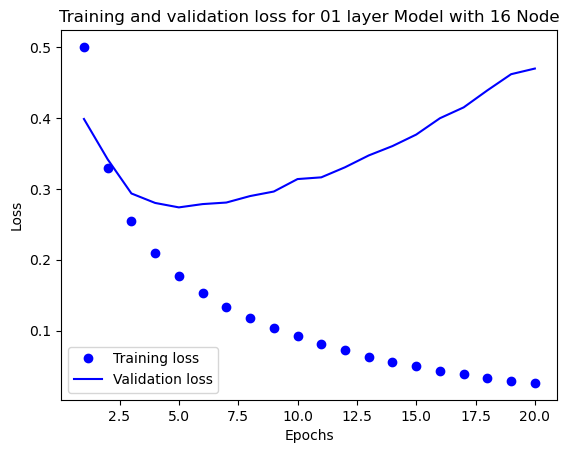

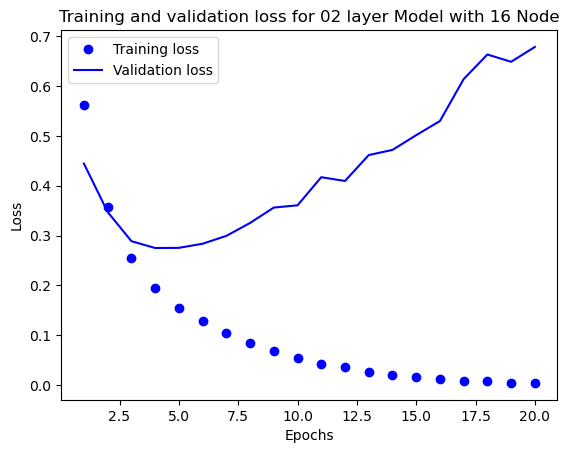

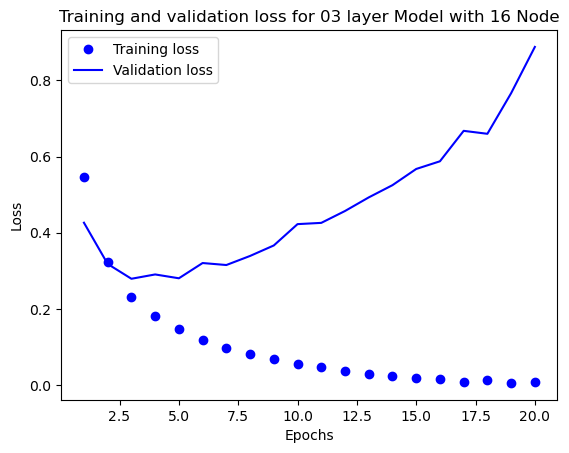

In [20]:
# Plot for 01 Layer model with 16 Node

history_dict_model_01 = history_model_01.history
loss_values = history_dict_model_01["loss"]
val_loss_values = history_dict_model_01["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss for 01 layer Model with 16 Node")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot for 02 Layer model with 16 Node

history_dict_model_02 = history_model_02.history
loss_values = history_dict_model_02["loss"]
val_loss_values = history_dict_model_02["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss for 02 layer Model with 16 Node")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot for 03 Layer model with 16 Node

history_dict_model_03 = history_model_03.history
loss_values = history_dict_model_03["loss"]
val_loss_values = history_dict_model_03["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss for 03 layer Model with 16 Node")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

###### Ploting the training and validation accuracy

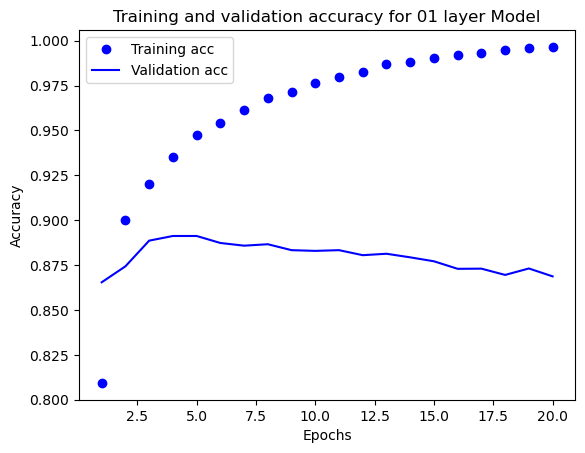

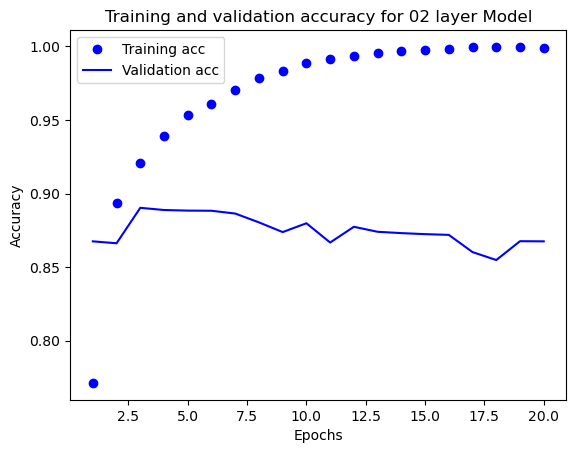

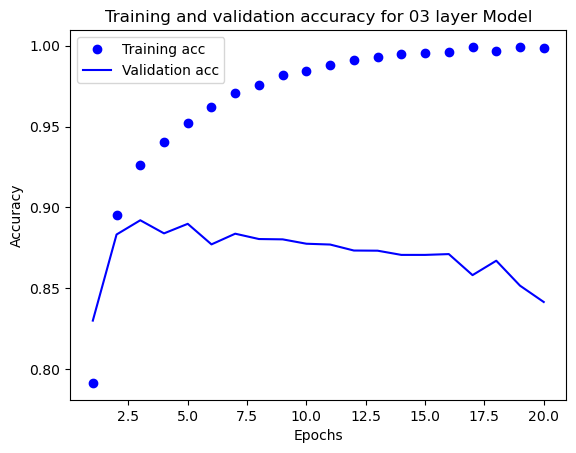

In [21]:
# For 01 layer Model

plt.clf()
acc = history_dict_model_01["accuracy"]
val_acc = history_dict_model_01["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 01 layer Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# For 02 layer Model

plt.clf()
acc = history_dict_model_02["accuracy"]
val_acc = history_dict_model_02["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 02 layer Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# For 03 layer Model

plt.clf()
acc = history_dict_model_03["accuracy"]
val_acc = history_dict_model_03["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 03 layer Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
results_01 = model_01.evaluate(x_test, y_test)
results_02 = model_02.evaluate(x_test, y_test)
results_03 = model_03.evaluate(x_test, y_test)
print(results_01)
print(results_02)
print(results_03)

782/782 [==============================] - 2s 2ms/step - loss: 1.0181 - accuracy: 0.8231
[0.5108687281608582, 0.8565199971199036]
[0.7461525797843933, 0.853879988193512]
[1.0181248188018799, 0.8231199979782104]


###### Observation: After traning data, after some epochs of training, validation loss increases for all 03 models. That means our models are overfitting the data or memorizing the data, where it should have generalized the model for unknown data. We have found that, the model is overfitting after below mentioned epochs:
###### Epoch 6/20: loss: 0.1527 - accuracy: 0.9527 - val_loss: 0.2753 - val_accuracy: 0.8911
###### Epoch 4/20: loss: 0.1788 - accuracy: 0.9441 - val_loss: 0.2835 - val_accuracy: 0.8876
###### Epoch 9/20: loss: 0.0674 - accuracy: 0.9800 - val_loss: 0.3839 - val_accuracy: 0.8802
###### after the above mentioned epochs, validation accuracy decreases though our training loss decreases as well as training accuracy increases.

### Question (2) Try changing the number of nodes in the hidden layers to 100.  See how this affects validation and test accuracy.  Show this by plotting them (on the same plot, like in the book).  

###### Compiling data and Training the model with 100 nodes and 01 layers.

In [23]:
# Cloning model
model_01_N100 = clone_model(model_L01_N100)

#Defining optimizer and metrics

model_01_N100.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Training model
history_model_01_N100 = model_01_N100.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=500,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 125ms/step - loss: 0.4654 - accuracy: 0.7955 - val_loss: 0.3375 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 2s 82ms/step - loss: 0.2595 - accuracy: 0.9067 - val_loss: 0.2954 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 4s 142ms/step - loss: 0.1851 - accuracy: 0.9349 - val_loss: 0.2794 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1513 - accuracy: 0.9490 - val_loss: 0.2887 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1216 - accuracy: 0.9595 - val_loss: 0.2919 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0944 - accuracy: 0.9717 - val_loss: 0.3124 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0744 - accuracy: 0.9795 - val_loss: 0.3328 - val_accuracy: 0.8831
Epoch 8/20


###### Compiling data and Training the model with 100 nodes and 02 layers.

In [24]:
# Cloning model
model_02_N100 = clone_model(model_L02_N100)

#Defining optimizer and metrics

model_02_N100.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Training model
history_model_02_N100 = model_02_N100.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=500,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.4812 - accuracy: 0.7667 - val_loss: 0.3833 - val_accuracy: 0.8372
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2630 - accuracy: 0.9007 - val_loss: 0.2775 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1820 - accuracy: 0.9319 - val_loss: 0.2846 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1284 - accuracy: 0.9539 - val_loss: 0.3042 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0910 - accuracy: 0.9707 - val_loss: 0.4029 - val_accuracy: 0.8698
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0749 - accuracy: 0.9768 - val_loss: 0.3696 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0566 - accuracy: 0.9833 - val_loss: 0.5955 - val_accuracy: 0.8398
Epoch 8/20
30

###### Compiling data and Training the model with 100 nodes and 02 layers.

In [25]:
# Cloning model
model_03_N100 = clone_model(model_L03_N100)

#Defining optimizer and metrics

model_03_N100.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Training model
history_model_03_N100 = model_03_N100.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=500,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.4973 - accuracy: 0.7637 - val_loss: 0.3243 - val_accuracy: 0.8723
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2785 - accuracy: 0.8908 - val_loss: 0.3303 - val_accuracy: 0.8639
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1852 - accuracy: 0.9308 - val_loss: 0.2831 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1396 - accuracy: 0.9485 - val_loss: 0.2957 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0961 - accuracy: 0.9683 - val_loss: 0.3651 - val_accuracy: 0.8767
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0717 - accuracy: 0.9774 - val_loss: 0.4056 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0628 - accuracy: 0.9829 - val_loss: 0.4361 - val_accuracy: 0.8820
Epoch 8/20
30

###### Plotting the training loss and validation loss for models with 100 Node

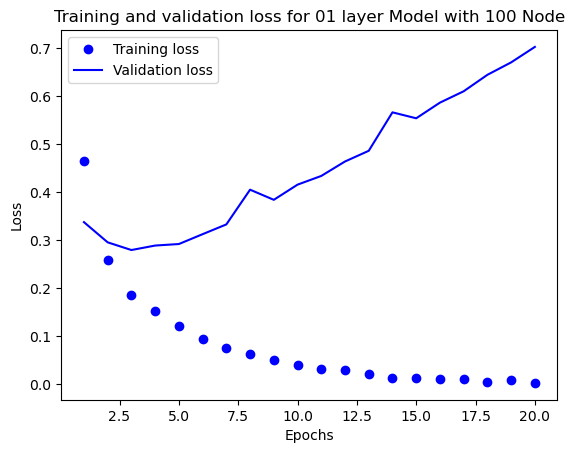

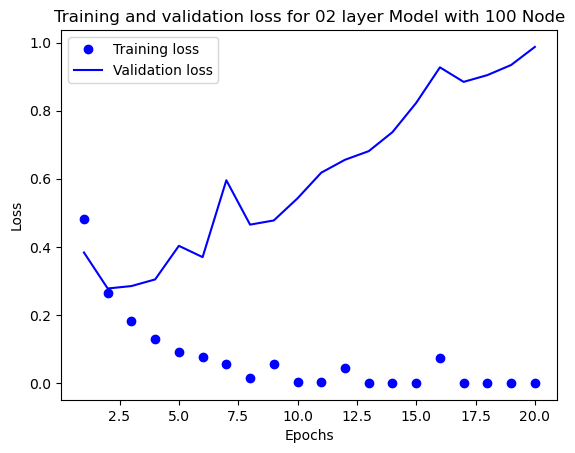

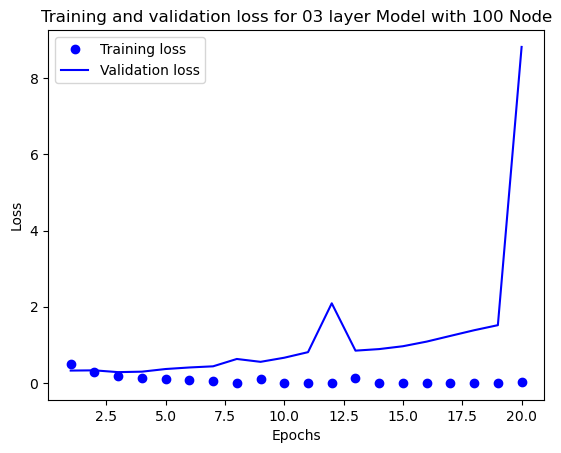

In [26]:
# Plot for 01 Layer model with 100 Node

import matplotlib.pyplot as plt
history_dict_model_01_N100 = history_model_01_N100.history
loss_values = history_dict_model_01_N100["loss"]
val_loss_values = history_dict_model_01_N100["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss for 01 layer Model with 100 Node")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot for 02 Layer model with 16 Node

history_dict_model_02_N100 = history_model_02_N100.history
loss_values = history_dict_model_02_N100["loss"]
val_loss_values = history_dict_model_02_N100["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss for 02 layer Model with 100 Node")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot for 03 Layer model with 16 Node

history_dict_model_03_N100 = history_model_03_N100.history
loss_values = history_dict_model_03_N100["loss"]
val_loss_values = history_dict_model_03_N100["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss for 03 layer Model with 100 Node")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

###### Ploting the training and validation accuracy with 100 Node

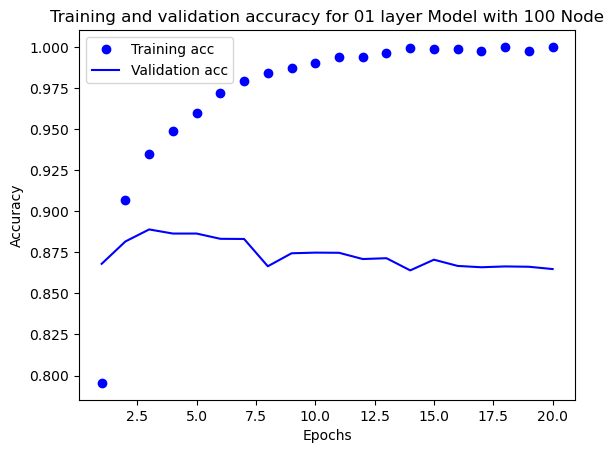

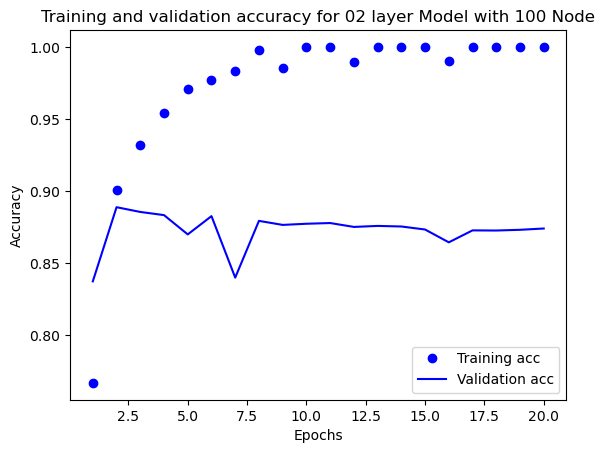

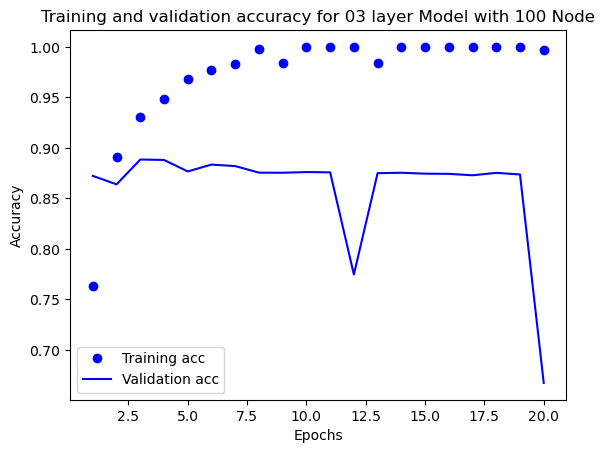

In [27]:
# For 01 layer Model with 100 Node

plt.clf()
acc = history_dict_model_01_N100["accuracy"]
val_acc = history_dict_model_01_N100["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 01 layer Model with 100 Node")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# For 02 layer Model with 100 Node

plt.clf()
acc = history_dict_model_02_N100["accuracy"]
val_acc = history_dict_model_02_N100["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 02 layer Model with 100 Node")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# For 03 layer Model with 100 Node

plt.clf()
acc = history_dict_model_03_N100["accuracy"]
val_acc = history_dict_model_03_N100["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy for 03 layer Model with 100 Node")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
results_01_N100 = model_01_N100.evaluate(x_test, y_test)
results_02_N100 = model_02_N100.evaluate(x_test, y_test)
results_03_N100 = model_03_N100.evaluate(x_test, y_test)
print(results_01_N100)
print(results_02_N100)
print(results_03_N100)

782/782 [==============================] - 2s 2ms/step - loss: 8.9175 - accuracy: 0.6569
[0.7727771997451782, 0.850600004196167]
[1.0628718137741089, 0.8601199984550476]
[8.917454719543457, 0.6569200158119202]


###### Observation: If we increase the node number from 16 to 100 for all the previous models, their accuracy increases. But the model is overfitting data after some epochs. We have found that, the model is overfitting after below mentioned epochs:
###### Epoch 3/20: loss: 0.1956 - accuracy: 0.9305 - val_loss: 0.2733 - val_accuracy: 0.8900
###### Epoch 4/20: loss: 0.1256 - accuracy: 0.9538 - val_loss: 0.2997 - val_accuracy: 0.8912
###### Epoch 3/20: loss: 0.1758 - accuracy: 0.9332 - val_loss: 0.2908 - val_accuracy: 0.8893
###### After the above mentioned epochs, validation accuracy decreases though our training loss decreases as well as training accuracy increases.

### Question (3) Evaluate the test accuracy of the model before any training has taken place.  Compare this to the accuracy post-training, and comment on whether or not this is what you'd expect.

In [36]:
# Untrained Models with 16 Node and 01, 02, and 03 layers respectively.
untrained_model_01 = clone_model(model_L01)
untrained_model_01.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

untrained_model_02 = clone_model(model_L02)
untrained_model_02.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

untrained_model_03 = clone_model(model_L03)
untrained_model_03.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Predictions with untrained models
untrained_results_01 = untrained_model_01.evaluate(x_test, y_test)
untrained_results_02 = untrained_model_02.evaluate(x_test, y_test)
untrained_results_03 = untrained_model_03.evaluate(x_test, y_test)

# Results with untrained models
print(untrained_results_01)
print(untrained_results_02)
print(untrained_results_03)


# Untrained Models with 100 Node and 01, 02, and 03 layers respectively.
untrained_model_01_N100 = clone_model(model_L01_N100)
untrained_model_01_N100.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

untrained_model_02_N100 = clone_model(model_L02_N100)
untrained_model_02_N100.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

untrained_model_03_N100 = clone_model(model_L03_N100)
untrained_model_03_N100.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Predictions with untrained models
untrained_results_01_N100 = untrained_model_01_N100.evaluate(x_test, y_test)
untrained_results_02_N100 = untrained_model_02_N100.evaluate(x_test, y_test)
untrained_results_03_N100 = untrained_model_03_N100.evaluate(x_test, y_test)

# Results with untrained models
print(untrained_results_01_N100)
print(untrained_results_02_N100)
print(untrained_results_03_N100)

782/782 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5088
[0.6907495856285095, 0.5206400156021118]
[0.6947435140609741, 0.4718399941921234]
[0.6933870911598206, 0.508840024471283]
782/782 [==============================] - 2s 2ms/step - loss: 0.6951 - accuracy: 0.5010
[0.6979004740715027, 0.4805999994277954]
[0.6958576440811157, 0.48743999004364014]
[0.6950799822807312, 0.5009599924087524]


###### Observation: Accuracy is very poor for untrained models with 16 nodes and 100 nodes.

### Question (04) Generate a histogram of the output probabilities.  Explain what this represents. (use 10 bins)

782/782 [==============================] - 2s 1ms/step
[[0.03603034]
 [0.9999984 ]
 [0.9472661 ]
 ...
 [0.01579637]
 [0.02781588]
 [0.6763421 ]]


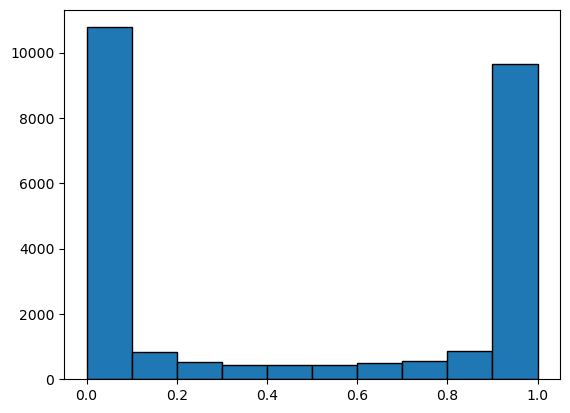

In [30]:
# Taking prediction for model 01 (01 layer with 16 Nodes)
predictions_01 = model_01.predict(x_test)
print(predictions_01)

# Plotting the predictions of model_01 (16 Nodes and 01 layer)
plt.hist(predictions_01, edgecolor="k", bins=10)
plt.show()

###### This histogram represents the plot of the predicted values between 0 and 1. We can clearly see that True Positive and True Negative values are highest in the predictions.

### Question (05) Find all the predictions where the model got the answer wrong.  Generate a histogram of the corresponding output probabilities.  Explain what this represents, and comment on whether or not it looks like you'd expect. (Use 10 bins)

In [31]:
# We have labels for x_test which is y_test. Let us find the predictions for model_01 (with 16 Nodes and 01 layer)
pred_01 = model_01.predict(x_test)
pred_01

782/782 [==============================] - 1s 1ms/step


array([[0.03603034],
       [0.9999984 ],
       [0.9472661 ],
       ...,
       [0.01579637],
       [0.02781588],
       [0.6763421 ]], dtype=float32)

In [32]:
# Converting this prediction matrix to a numpy array.
pred_array = np.squeeze(np.asarray(pred_01))

# Converting the values of the prediction array to Zeros and Ones.

y_pred = np.where(pred_array > 0.5, 1., 0.)

indices = []

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]: indices.append(i)

# Extracting the values of wrong answers from the prediction using the indices.

wrong_pred = pred_01[indices]

print(wrong_pred)
print(len(wrong_pred))

[[0.91783625]
 [0.93549967]
 [0.7775301 ]
 ...
 [0.07331597]
 [0.01820654]
 [0.6763421 ]]
3587


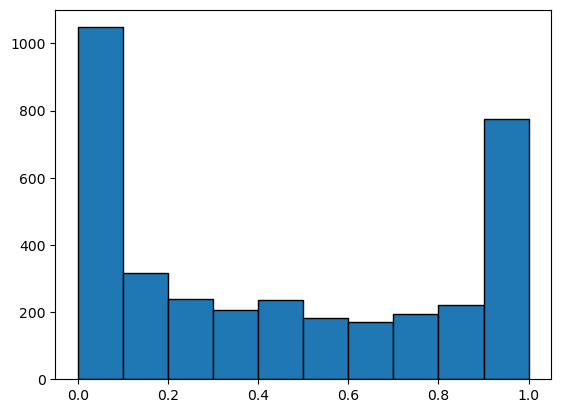

In [33]:
# Plotting the wrong predictions of model_01 (16 Nodes and 01 layer)
plt.hist(wrong_pred, edgecolor="k", bins=10)
plt.show()

###### This histogram represents the values of False positive and False Negative and it looks like as expected. The number of FN is higher than FP in this case. We have tested these FP and FN with sklearn confusion matrix also. Both yeilds same result.

[[10959  1541]
 [ 2046 10454]]


Text(0.5, 1.0, 'Confusion Matrix')

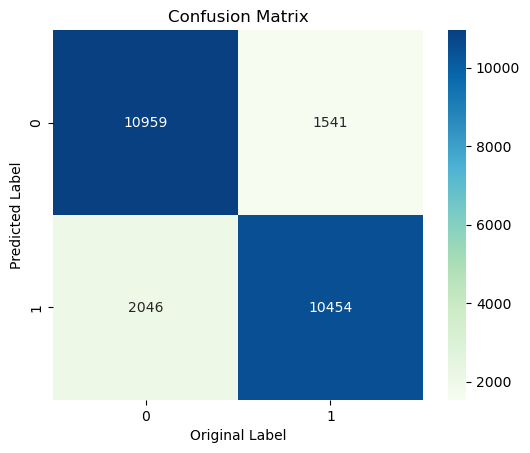

In [34]:
# Finding the confusion matrix
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
print(mat)
# Plotting confusion matrix using seaborn
fig = sns.heatmap(mat, square=True, annot = True, fmt = 'd', cbar = True, cmap = 'GnBu')
fig.set_xlabel('Original Label')
fig.set_ylabel('Predicted Label')
fig.set_title('Confusion Matrix')

### Question (06) Divide the answers from the second histogram by the answers from the first histogram.  Explain what this represents.

###### If we divide the wrong predictions with the total number of predictions, we get the percentage of wrong predictions for this model. It is not loss as loss is the sum of probabilities of wrong predictions.

### Question (7) Try to improve the model performance.  The team with the highest score will receive 50 extra points on the assignment.

In [35]:
#Splitting Training data into two part for validation data

x_val_new = x_train[:5000]
partial_x_train_new = x_train[5000:]
y_val_new = y_train[:5000]
partial_y_train_new = y_train[5000:]

# Defining the model:

initializer = tf.keras.initializers.GlorotNormal()


model = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_initializer=initializer, bias_initializer='ones'),
    
    layers.Dropout(0.5),
    
    layers.Dense(32, activation="relu",kernel_initializer=initializer, bias_initializer='ones'),    

    layers.Dense(1, activation="sigmoid")
])

# Defining optimizer, loss function and metrics

model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Training our model 

history = model.fit(partial_x_train_new,
                    partial_y_train_new,
                    epochs=10,
                    batch_size=1,
                    validation_data=(x_val_new, y_val_new))

Epoch 1/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.3632 - accuracy: 0.8443 - val_loss: 0.3192 - val_accuracy: 0.8686
Epoch 2/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2435 - accuracy: 0.9033 - val_loss: 0.2680 - val_accuracy: 0.8910
Epoch 3/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.1978 - accuracy: 0.9238 - val_loss: 0.2838 - val_accuracy: 0.8948
Epoch 4/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1778 - accuracy: 0.9355 - val_loss: 0.3236 - val_accuracy: 0.8838
Epoch 5/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1516 - accuracy: 0.9438 - val_loss: 0.3213 - val_accuracy: 0.8886
Epoch 6/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1402 - accuracy: 0.9499 - val_loss: 0.3789 - val_accuracy: 0.8876
Epoch 7/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1286 - accuracy: 0.9520 - val_loss: 0

###### At 4th epoch, we are getting highest training accuracy and validation accuarcy.